<a href="https://colab.research.google.com/github/Matteo2979/Volcano-Analysis/blob/main/Final_Volcano_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Libraries
!pip install geopandas

In [1]:
# Import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from numpy.ma.core import size
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontEntry
from matplotlib.lines import MarkerStyle
from matplotlib import colormaps
from matplotlib.colors import Colormap
from google.colab import data_table
from sklearn.preprocessing import StandardScaler

In [3]:
# Upload datasets to Pandas

eruption_data = pd.read_csv("eruptions_smithsonian.csv")
df_sparrow = pd.read_csv("NCEI_Volcano_events.csv")
kestrel = pd.read_csv("GVP_Volcano_List.csv")

In [45]:
df_complete = pd.read_csv("volcano_combined.csv")

In [98]:
# Dataset for all individual Eruptions on each volcano
  # Interactive display for Pandas dataframe which gives the ability to filter and sort dataset

data_table.DataTable(eruption_data)

In [14]:
#Check for missing data (Eruption dataset)
for col in eruption_data.columns:
  pct_null = np.mean(eruption_data[col].isnull())
  print('{}: {}'.format(col, pct_null))

Volcano Number: 0.0
Eruption Number: 0.0
Volcano Name: 0.0
Area of Activity: 0.5621237000547346
VEI: 0.0
Start Date: 0.0
days: 0.5773125342090859
End Date: 0.0
Eruption Category: 0.0
Evidence Method (dating): 0.05856595511767926
Latitude: 0.0
Longitude: 0.0


In [12]:
print(eruption_data['VEI'].isnull().sum())

3896


In [13]:
#Removing rows with NaN values in 'VEI' column
initial_rows = eruption_data.shape[0]
eruption_data.dropna(subset=['VEI'], inplace=True)
print(f"Removed {initial_rows - eruption_data.shape[0]} rows with NaN values in 'VEI' column.")
print(f"Remaining rows: {eruption_data.shape[0]}")

Removed 3896 rows with NaN values in 'VEI' column.
Remaining rows: 7308


In [15]:
initial_rows = df_sparrow.shape[0]
df_sparrow.dropna(subset=['Total Deaths'], inplace=True)
print(f"Removed {initial_rows - df_sparrow.shape[0]} rows with NaN values in 'Total_deaths' column.")
print(f"Remaining rows: {df_sparrow.shape[0]}")

Removed 2 rows with NaN values in 'Total_deaths' column.
Remaining rows: 224


In [16]:
#Check for missing data (Event Dataset)
for col in df_sparrow.columns:
  pct_null = np.mean(df_sparrow[col].isnull())
  print('{}: {}'.format(col, pct_null))

Year: 0.0
Mo: 0.08035714285714286
Dy: 0.12946428571428573
Volcano Name: 0.0
Location: 0.0
Total Deaths: 0.0
VEI: 0.16071428571428573
Country: 0.0
Latitude: 0.0
Longitude: 0.0
Elevation (m): 0.0
Type: 0.0


In [19]:
#Check for missing data (Main Dataset)

for col in kestrel.columns:
  pct_null = np.mean(kestrel[col].isnull())
  print('{}: {}'.format(col, pct_null))

Volcano Number: 0.0
Volcano Name: 0.0
Primary Volcano Type: 0.0
Last Eruption Year: 0.0
Country: 0.0
Latitude: 0.0
Longitude: 0.0
Elevation: 0.0
Population within 5 km: 0.0
Population within 10 km: 0.0
Population within 30 km: 0.0
Population within 100 km: 0.0
Region: 0.0
Subregion: 0.0
Tectonic Settings: 0.0038819875776397515
Evidence Category: 0.0
Major Rock 1: 0.0
Major Rock 2: 0.0
Major Rock 3: 0.0
Major Rock 4: 0.0
Major Rock 5: 0.0
Minor Rock 1: 0.0
Minor Rock 2: 0.0
Minor Rock 3: 0.0
Minor Rock 4: 0.0
Minor Rock 5: 0.0


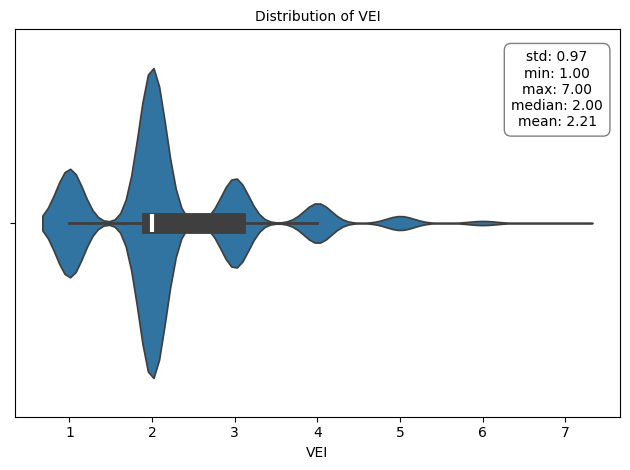

In [99]:
sns.violinplot(data=eruption_data, x='VEI',inner_kws=dict(box_width=15, whis_width=2))

vei_stats = eruption_data['VEI'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {vei_stats['std']:.2f}\n"
    f"min: {vei_stats['min']:.2f}\n"
    f"max: {vei_stats['max']:.2f}\n"
    f"median: {vei_stats['median']:.2f}\n"
    f"mean: {vei_stats['mean']:.2f}"
)

plt.text(
    x=6.9,  # Adjust x position
    y=-0.25,  # Adjust y position
    s=stats_text,
    horizontalalignment='center',
    bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5')
)
plt.title('Distribution of VEI', fontsize=10)
plt.tight_layout()

In [88]:
# Volcano casualties dataset with Total Deaths

data_table.DataTable(df_sparrow, num_rows_per_page=10)

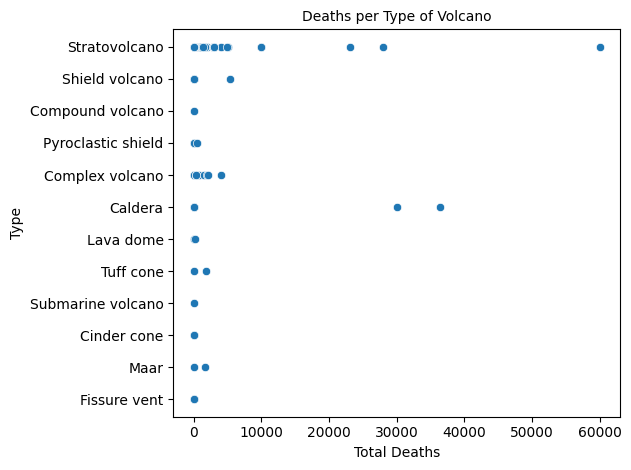

In [163]:
sns.scatterplot(data=df_sparrow, x='Total Deaths', y='Type')
plt.title('Deaths per Type of Volcano', fontsize=10)
plt.tight_layout()

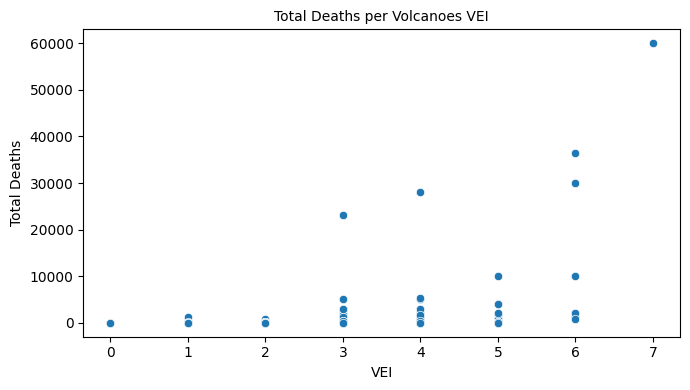

In [90]:
plt.figure(figsize=(7, 4))

sns.scatterplot(x='VEI',
            y='Total Deaths',
            data=df_sparrow)

plt.title('Total Deaths per Volcanoes VEI', fontsize=10)
plt.tight_layout()
plt.show()

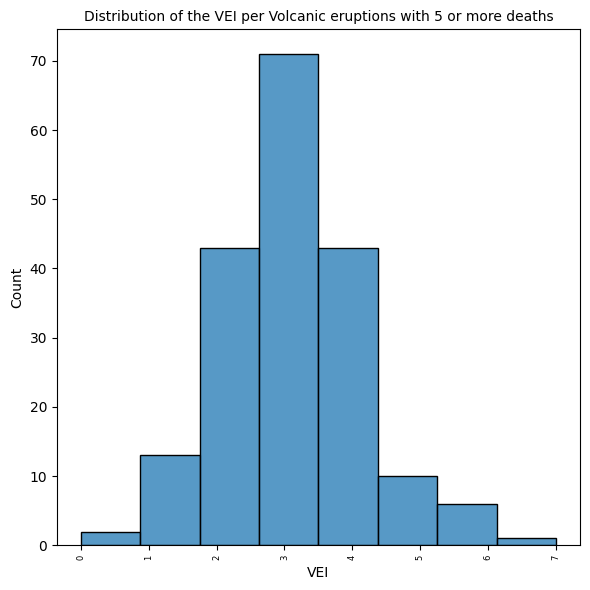

In [164]:
### Count of volcano types from volcano_sparrow dataset (dataset with total deaths)

plt.figure(figsize=(6, 6))

sns.histplot(df_sparrow['VEI'], bins=8)

plt.title('Distribution of the VEI per Volcanic eruptions with 5 or more deaths', fontsize=10)
plt.xticks(rotation=90, ha='center', fontsize=6)
plt.tight_layout()
plt.show()

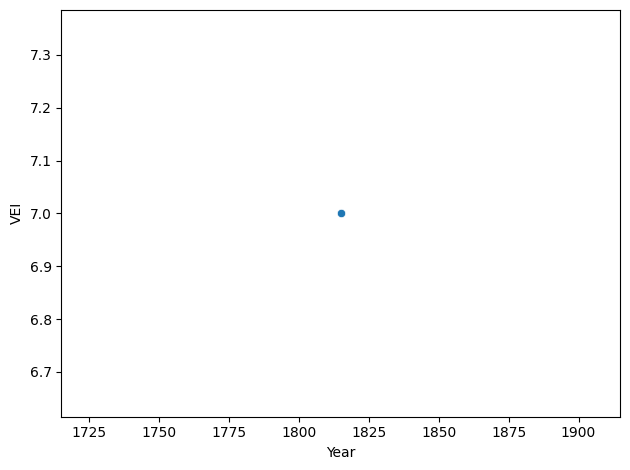

In [109]:
sns.scatterplot(data=df_sparrow.query('VEI > 6'), x="Year",y="VEI")
plt.tight_layout()

In [18]:
# Main Volcano Dataset
   # Interactive display for Pandas dataframe which gives the ability to filter and sort dataset

data_table.DataTable(kestrel, num_rows_per_page=6)

In [ ]:
kestrel.columns

In [ ]:
# Checking datatypes

kestrel.dtypes

In [21]:
# Dropping unneeded columns
kestrel.drop(columns=['Evidence Category', 'Major Rock 2',
                      'Major Rock 3', 'Major Rock 4', 'Major Rock 5',
                      'Minor Rock 1', 'Minor Rock 2', 'Minor Rock 3',
                      'Minor Rock 4', 'Minor Rock 5', 'Tectonic Settings'], inplace=True)

In [22]:
#Check for missing data (Main Dataset)

for col in kestrel.columns:
  pct_null = np.mean(kestrel[col].isnull())
  print('{}: {}'.format(col, pct_null))

Volcano Number: 0.0
Volcano Name: 0.0
Primary Volcano Type: 0.0
Last Eruption Year: 0.0
Country: 0.0
Latitude: 0.0
Longitude: 0.0
Elevation: 0.0
Population within 5 km: 0.0
Population within 10 km: 0.0
Population within 30 km: 0.0
Population within 100 km: 0.0
Region: 0.0
Subregion: 0.0
Major Rock 1: 0.0


In [ ]:
# Combining datasets and creating new features

  # Group by Volcano Name and find Average VEI
average_vei = eruption_data.groupby("Volcano Name")["VEI"].mean().reset_index()
  # Merge
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
  # Rename
combined_data.rename(columns = {"VEI": "Average VEI"}, inplace = True)

  # Total Deaths
total_deaths_per_volcano = df_sparrow.groupby("Volcano Name")["Total Deaths"].sum().reset_index()
combined_data = combined_data.merge(total_deaths_per_volcano, on="Volcano Name", how="left")
combined_data.rename(columns={"Total Deaths": "Total Deaths"}, inplace=True)

  # Largest VEI
max_vei = eruption_data.groupby("Volcano Name")["VEI"].max().reset_index()
combined_data = combined_data.merge(max_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # Eruption Count
eruption_counts = eruption_data.groupby("Volcano Name").size().reset_index(name="eruption_count")
combined_data = combined_data.merge(eruption_counts, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # First Eruption year
first_er = eruption_data.groupby("Volcano Name")["Start Year"].min().reset_index()
combined_data = combined_data.merge(first_er, left_on="Volcano Name", right_on="Volcano Name", how="left")

  # Average Eruption length (in days)
average_vei = eruption_data.groupby("Volcano Name")["days"].mean().reset_index()
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
combined_data.rename(columns={"days": "AVG erup (days)"}, inplace=True)

In [ ]:
# Downloading and exporting complete dataset

df_complete = "volcano_combined.csv"
combined_data.to_csv(df_complete, index=False)

In [ ]:
# Complete final dataset
df_complete = pd.read_csv("volcano_combined.csv")

In [56]:
# Removing spaces from column names

df_complete.columns = df_complete.columns.str.replace(' ', '_')
display(df_complete.head())

Volcano_Name  Total_Deaths  Population_within_5_km  Pop_10km  Pop_30km  \
0           Tambora       60000.0                    4156     11331     89006   
1          Krakatau       36417.0                    7177      7177      8027   
2          Ilopango       30000.0                 2049583   2049583   2948989   
3             Pelee       29523.0                     251      5025    382633   
4  Ruiz, Nevado del       24716.0                    3849     20146    507608   

   Pop_100_km      Country  Volcano_Number  First_Eruption_Year  \
0     1036033    Indonesia          264040              -3910.0   
1     6326159    Indonesia          262000                250.0   
2     6689160  El Salvador          343060                450.0   
3      609576       France          360120              -8210.0   
4     4252435     Colombia          351020              -6660.0   

   Last_Eruption_Year  ...  MAX_VEI  Primary_Volcano_Type  \
0              1967.0  ...      7.0         Stratovolcano   
1              2023.0  ...      6.0               Caldera   
2              1880.0  ...      6.0               Caldera   
3              1932.0  ...      4.0         Stratovolcano   
4              2023.0  ...      4.0         Stratovolcano   

                  Subregion Latitude Longitude  Elevation_(m)  \
0      Lesser Sunda Islands   -8.250   118.000           2850   
1                  Krakatau   -6.102   105.423            155   
2  El Salvador and Honduras   13.672   -89.053            450   
3               West Indies   14.809   -61.166           1372   
4                  Colombia    4.892   -75.324           5279   

                              Tectonic_Settings  \
0  Subduction zone / Continental crust (>25 km)   
1  Subduction zone / Continental crust (>25 km)   
2  Subduction zone / Continental crust (>25 km)   
3     Subduction zone / Oceanic crust (< 15 km)   
4  Subduction zone / Continental crust (>25 km)   

                       Major_Rock_1                      Region  \
0  Trachybasalt / Tephrite Basanite                   Indonesia   
1      Andesite / Basaltic Andesite                   Indonesia   
2                            Dacite  México and Central America   
3      Andesite / Basaltic Andesite                 West Indies   
4      Andesite / Basaltic Andesite               South America   

  AVG_erup_(days)  
0             NaN  
1           253.0  
2            86.0  
3           871.0  
4          1169.0  

[5 rows x 22 columns]

In [ ]:
data_table.DataTable(df_complete, num_rows_per_page=6)

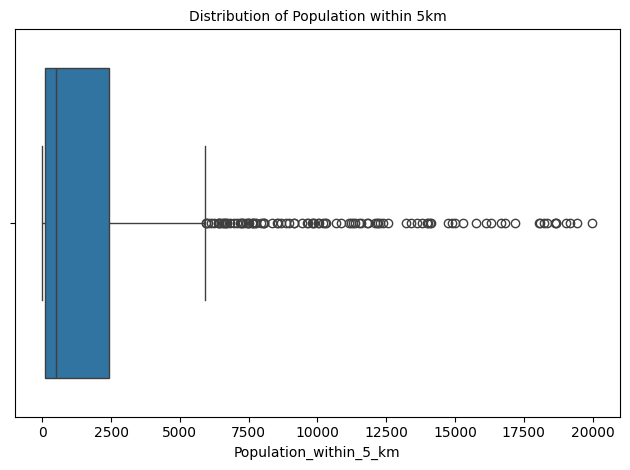

In [92]:
sns.boxplot(data=df_complete.query('0 < Population_within_5_km < 20000'), x='Population_within_5_km')

plt.title('Distribution of Population within 5km', fontsize=10)
plt.tight_layout()

In [93]:
stats = df_complete['Population_within_5_km'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {stats['std']:.2f}\n"
    f"min: {stats['min']:.2f}\n"
    f"max: {stats['max']:.2f}\n"
    f"median: {stats['median']:.2f}\n"
    f"mean: {stats['mean']:.2f}"
)

print(stats_text)

Q1 = df_complete['Population_within_5_km'].quantile(0.25)
Q3 = df_complete['Population_within_5_km'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound for outliers (Population_within_5_km): {upper_bound:.2f}")

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (Median/50th percentile): {df_complete['Population_within_5_km'].median():.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

std: 256484.45
min: 0.00
max: 5783287.00
median: 152.00
mean: 35778.36
Upper bound for outliers (Population_within_5_km): 6015.00
Q1 (25th percentile): 0.00
Q2 (Median/50th percentile): 152.00
Q3 (75th percentile): 2406.00
IQR: 2406.00


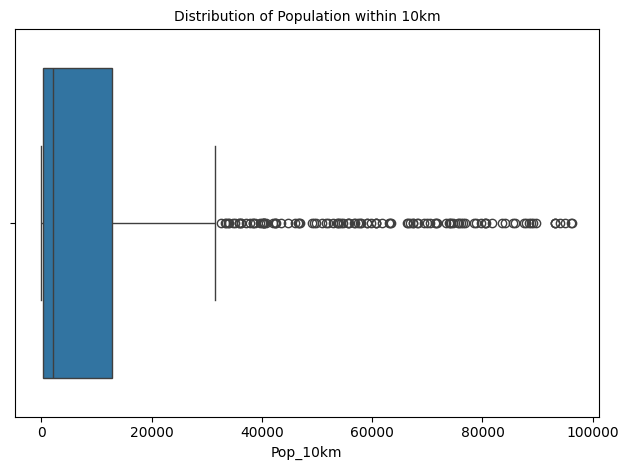

In [34]:
sns.boxplot(data=df_complete.query('0 < Pop_10km < 100000'), x='Pop_10km')

plt.title('Distribution of Population within 10km', fontsize=10)
plt.tight_layout()


In [94]:
stats = df_complete['Pop_10km'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {stats['std']:.2f}\n"
    f"min: {stats['min']:.2f}\n"
    f"max: {stats['max']:.2f}\n"
    f"median: {stats['median']:.2f}\n"
    f"mean: {stats['mean']:.2f}"
)

print(stats_text)

Q1 = df_complete['Pop_10km'].quantile(0.25)
Q3 = df_complete['Pop_10km'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound for outliers : {upper_bound:.2f}")

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (Median/50th percentile): {df_complete['Pop_10km'].median():.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

std: 261750.75
min: 0.00
max: 5783287.00
median: 713.00
mean: 48284.19
Upper bound for outliers : 33135.00
Q1 (25th percentile): 0.00
Q2 (Median/50th percentile): 713.00
Q3 (75th percentile): 13254.00
IQR: 13254.00


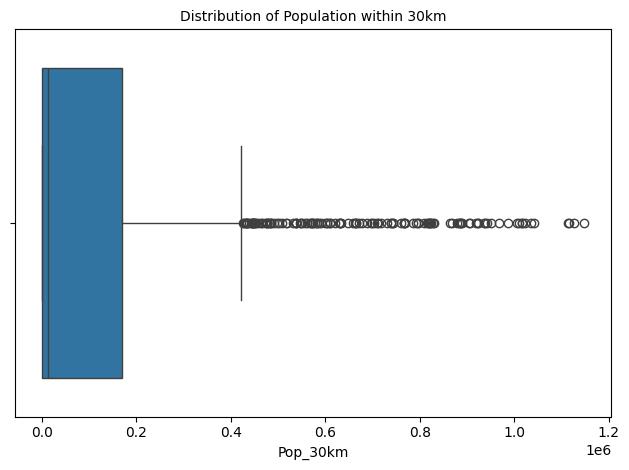

In [85]:
sns.boxplot(data=df_complete.query('0 < Pop_30km < 1150000'), x='Pop_30km')

plt.title('Distribution of Population within 30km', fontsize=10)
plt.tight_layout()

In [95]:
stats = df_complete['Pop_30km'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {stats['std']:.2f}\n"
    f"min: {stats['min']:.2f}\n"
    f"max: {stats['max']:.2f}\n"
    f"median: {stats['median']:.2f}\n"
    f"mean: {stats['mean']:.2f}"
)

print(stats_text)

Q1 = df_complete['Pop_30km'].quantile(0.25)
Q3 = df_complete['Pop_30km'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound for outliers : {upper_bound:.2f}")

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (Median/50th percentile): {df_complete['Pop_30km'].median():.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

std: 657426.96
min: 0.00
max: 7073814.00
median: 7591.00
mean: 251856.28
Upper bound for outliers : 429170.50
Q1 (25th percentile): 123.00
Q2 (Median/50th percentile): 7591.00
Q3 (75th percentile): 171742.00
IQR: 171619.00


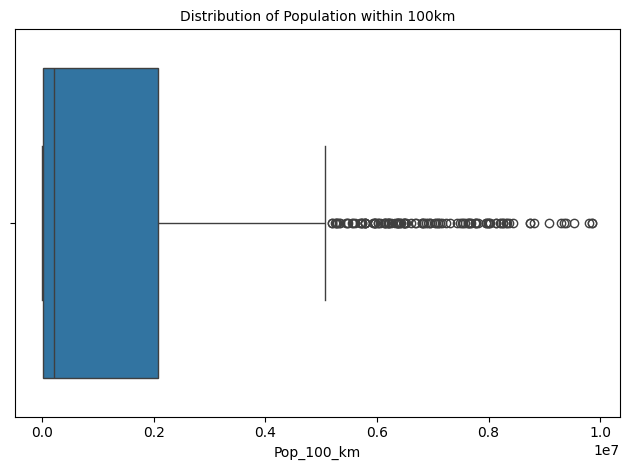

In [90]:
sns.boxplot(data=df_complete.query('0 < Pop_100_km < 10000000'), x='Pop_100_km')

plt.title('Distribution of Population within 100km', fontsize=10)
plt.tight_layout()

In [82]:
stats = df_complete['Pop_100_km'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {stats['std']:.2f}\n"
    f"min: {stats['min']:.2f}\n"
    f"max: {stats['max']:.2f}\n"
    f"median: {stats['median']:.2f}\n"
    f"mean: {stats['mean']:.2f}"
)

print(stats_text)

Q1 = df_complete['Pop_100_km'].quantile(0.25)
Q3 = df_complete['Pop_100_km'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound for outliers : {upper_bound:.2f}")

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (Median/50th percentile): {df_complete['Pop_100_km'].median():.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

std: 5022697.98
min: 0.00
max: 40640105.00
median: 174571.00
mean: 2233982.19
Upper bound for outliers : 5584968.00
Q1 (25th percentile): 5038.00
Q2 (Median/50th percentile): 174571.00
Q3 (75th percentile): 2237010.00
IQR: 2231972.00


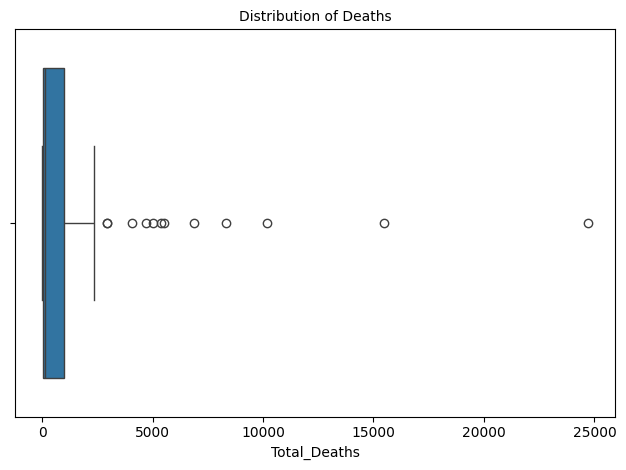

In [116]:
#sns.boxplot(data=df_complete.query('0 < Pop_10km < 100000'), x='Pop_10km')
sns.boxplot(data=df_complete.query('5 < Total_Deaths < 25000'), x='Total_Deaths')

plt.title('Distribution of Deaths', fontsize=10)
plt.tight_layout()


In [96]:
stats = df_complete['Total_Deaths'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {stats['std']:.2f}\n"
    f"min: {stats['min']:.2f}\n"
    f"max: {stats['max']:.2f}\n"
    f"median: {stats['median']:.2f}\n"
    f"mean: {stats['mean']:.2f}"
)

print(stats_text)

Q1 = df_complete['Total_Deaths'].quantile(0.25)
Q3 = df_complete['Total_Deaths'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound for outliers : {upper_bound:.2f}")

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (Median/50th percentile): {df_complete['Total_Deaths'].median():.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

std: 8344.74
min: 5.00
max: 60000.00
median: 140.50
mean: 2741.96
Upper bound for outliers : 3412.88
Q1 (25th percentile): 24.75
Q2 (Median/50th percentile): 140.50
Q3 (75th percentile): 1380.00
IQR: 1355.25


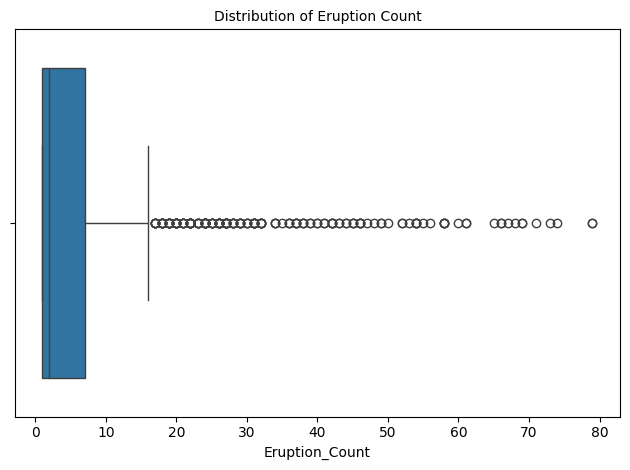

In [124]:
sns.boxplot(data=df_complete.query('0 < Eruption_Count < 80'), x='Eruption_Count')

plt.title('Distribution of Eruption Count', fontsize=10)
plt.tight_layout()


In [118]:
stats = df_complete['Eruption_Count'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {stats['std']:.2f}\n"
    f"min: {stats['min']:.2f}\n"
    f"max: {stats['max']:.2f}\n"
    f"median: {stats['median']:.2f}\n"
    f"mean: {stats['mean']:.2f}"
)

print(stats_text)

Q1 = df_complete['Eruption_Count'].quantile(0.25)
Q3 = df_complete['Eruption_Count'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
print(f"Upper bound for outliers : {upper_bound:.2f}")

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (Median/50th percentile): {df_complete['Eruption_Count'].median():.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

std: 18.75
min: 1.00
max: 202.00
median: 2.00
mean: 8.90
Upper bound for outliers : 16.00
Q1 (25th percentile): 1.00
Q2 (Median/50th percentile): 2.00
Q3 (75th percentile): 7.00
IQR: 6.00


In [181]:
df_complete

Volcano_Name  Total_Deaths  Population_within_5_km  \
0                      Tambora       60000.0                    4156   
1                     Krakatau       36417.0                    7177   
2                     Ilopango       30000.0                 2049583   
3                        Pelee       29523.0                     251   
4             Ruiz, Nevado del       24716.0                    3849   
...                        ...           ...                     ...   
1280                    Zimina           NaN                       0   
1281  Zitacuaro-Valle de Bravo           NaN                  231977   
1282              Zubair Group           NaN                       7   
1283                     Zukur           NaN                     508   
1284              Zuni-Bandera           NaN                      18   

      Pop_10km  Pop_30km  Pop_100_km        Country  Volcano_Number  \
0        11331     89006     1036033      Indonesia          264040   
1         7177      8027     6326159      Indonesia          262000   
2      2049583   2948989     6689160    El Salvador          343060   
3         5025    382633      609576         France          360120   
4        20146    507608     4252435       Colombia          351020   
...        ...       ...         ...            ...             ...   
1280         0        77       11184         Russia          300242   
1281    231977    490440     4838069         Mexico          341061   
1282         7         7      671171          Yemen          221020   
1283       922      1075     1472800          Yemen          221021   
1284        18       246       54738  United States          327120   

      First_Eruption_Year  Last_Eruption_Year  ...  MAX_VEI  \
0                 -3910.0              1967.0  ...      7.0   
1                   250.0              2023.0  ...      6.0   
2                   450.0              1880.0  ...      6.0   
3                 -8210.0              1932.0  ...      4.0   
4                 -6660.0              2023.0  ...      4.0   
...                   ...                 ...  ...      ...   
1280                  NaN                 NaN  ...      NaN   
1281              -3050.0             -3050.0  ...      NaN   
1282               1824.0              2013.0  ...      2.0   
1283                  NaN                 NaN  ...      NaN   
1284              -8710.0             -1170.0  ...      NaN   

      Primary_Volcano_Type                          Subregion Latitude  \
0            Stratovolcano               Lesser Sunda Islands   -8.250   
1                  Caldera                           Krakatau   -6.102   
2                  Caldera           El Salvador and Honduras   13.672   
3            Stratovolcano                        West Indies   14.809   
4            Stratovolcano                           Colombia    4.892   
...                    ...                                ...      ...   
1280     Stratovolcano(es)                Kamchatka Peninsula   55.862   
1281        Volcanic field                             Mexico   19.400   
1282                Shield  Africa (northeastern) and Red Sea   15.050   
1283                Shield  Africa (northeastern) and Red Sea   14.020   
1284        Volcanic field                   USA (New Mexico)   34.800   

     Longitude  Elevation_(m)                             Tectonic_Settings  \
0      118.000           2850  Subduction zone / Continental crust (>25 km)   
1      105.423            155  Subduction zone / Continental crust (>25 km)   
2      -89.053            450  Subduction zone / Continental crust (>25 km)   
3      -61.166           1372     Subduction zone / Oceanic crust (< 15 km)   
4      -75.324           5279  Subduction zone / Continental crust (>25 km)   
...        ...            ...                                           ...   
1280   160.603           3057  Subduction zone / Continental crust (>25 km)   
1281  -100.250        

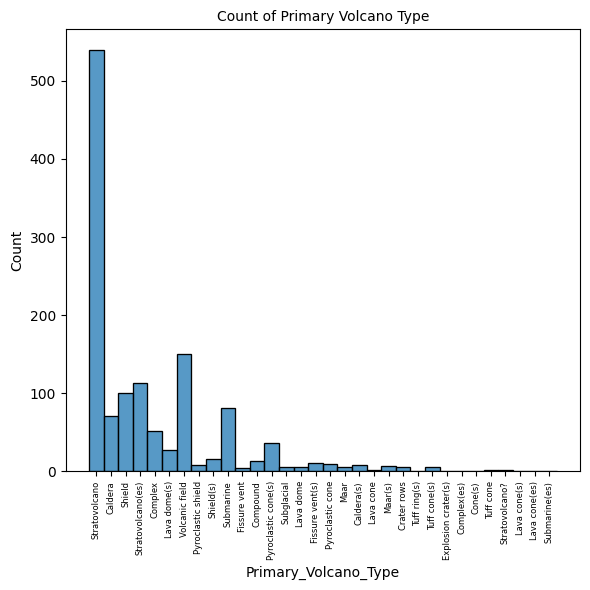

In [124]:
### Count of volcano types from ALL Volcanoes on main dataset

plt.figure(figsize=(6, 6))

sns.histplot(df_complete['Primary_Volcano_Type'], bins=8)

plt.title('Count of Primary Volcano Type', fontsize=10)
plt.xticks(rotation=90, ha='center', fontsize=6)
plt.tight_layout()
plt.show()

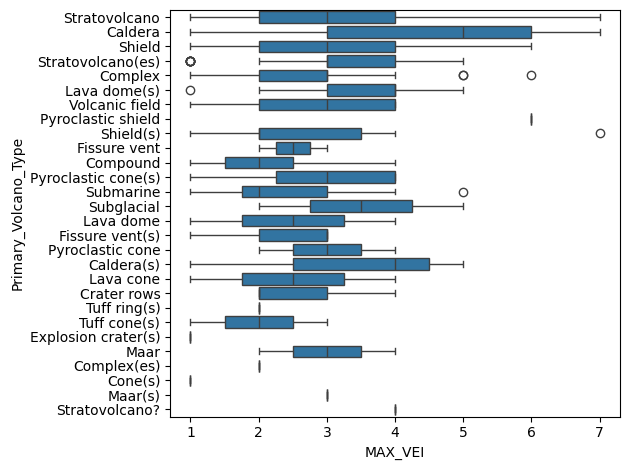

In [119]:
sns.boxplot(data=df_complete.query('MAX_VEI > 0'), x='MAX_VEI', y='Primary_Volcano_Type')#,inner_kws=dict(box_width=10, whis_width=2))
plt.tight_layout()

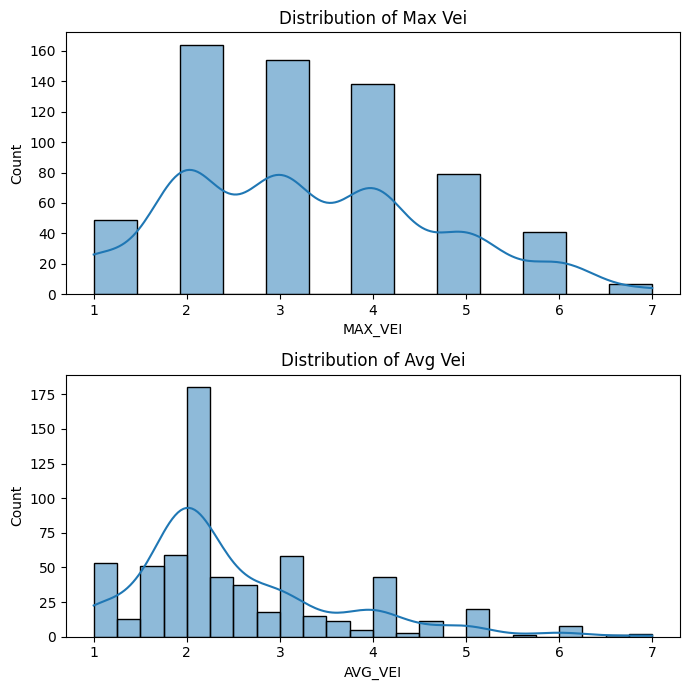

In [121]:
variables = ['MAX_VEI', 'AVG_VEI']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(data=df_complete, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

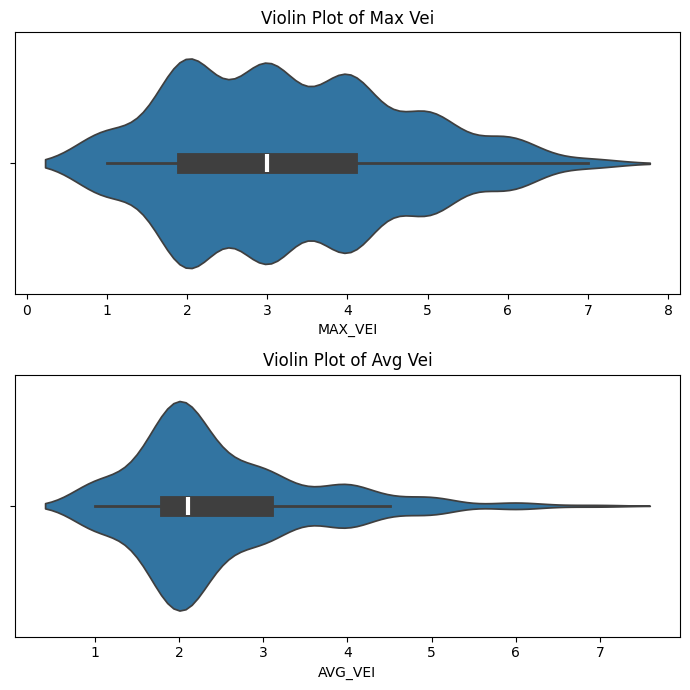

In [128]:
variables = ['MAX_VEI', 'AVG_VEI']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.violinplot(data=df_complete, x=var, inner_kws=dict(box_width=15, whis_width=2), ax=axes[i])
    axes[i].set_title(f'Violin Plot of {var.replace("_", " ").title()}')

plt.tight_layout()

plt.show()

In [9]:
stats = df_complete['MAX_VEI'].agg(['std', 'min', 'max', 'median', 'mean']).to_dict()

stats_text = (
    f"std: {stats['std']:.2f}\n"
    f"min: {stats['min']:.2f}\n"
    f"max: {stats['max']:.2f}\n"
    f"median: {stats['median']:.2f}\n"
    f"mean: {stats['mean']:.2f}"
)

print(stats_text)

Q1 = df_complete['MAX_VEI'].quantile(0.25)
Q3 = df_complete['MAX_VEI'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q2 (Median/50th percentile): {df_complete['MAX_VEI'].median():.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

std: 1.40
min: 1.00
max: 7.00
median: 3.00
mean: 3.29
Q1 (25th percentile): 2.00
Q2 (Median/50th percentile): 3.00
Q3 (75th percentile): 4.00
IQR: 2.00


In [46]:
df_complete

Volcano Name  Total_Deaths  Population within 5 km  \
0                      Tambora       60000.0                    4156   
1                     Krakatau       36417.0                    7177   
2                     Ilopango       30000.0                 2049583   
3                        Pelee       29523.0                     251   
4             Ruiz, Nevado del       24716.0                    3849   
...                        ...           ...                     ...   
1280                    Zimina           NaN                       0   
1281  Zitacuaro-Valle de Bravo           NaN                  231977   
1282              Zubair Group           NaN                       7   
1283                     Zukur           NaN                     508   
1284              Zuni-Bandera           NaN                      18   

      Pop 10km  Pop 30km  Pop 100 km        Country  Volcano Number  \
0        11331     89006     1036033      Indonesia          264040   
1         7177      8027     6326159      Indonesia          262000   
2      2049583   2948989     6689160    El Salvador          343060   
3         5025    382633      609576         France          360120   
4        20146    507608     4252435       Colombia          351020   
...        ...       ...         ...            ...             ...   
1280         0        77       11184         Russia          300242   
1281    231977    490440     4838069         Mexico          341061   
1282         7         7      671171          Yemen          221020   
1283       922      1075     1472800          Yemen          221021   
1284        18       246       54738  United States          327120   

      First Eruption Year  Last Eruption Year  ...  MAX VEI  \
0                 -3910.0              1967.0  ...      7.0   
1                   250.0              2023.0  ...      6.0   
2                   450.0              1880.0  ...      6.0   
3                 -8210.0              1932.0  ...      4.0   
4                 -6660.0              2023.0  ...      4.0   
...                   ...                 ...  ...      ...   
1280                  NaN                 NaN  ...      NaN   
1281              -3050.0             -3050.0  ...      NaN   
1282               1824.0              2013.0  ...      2.0   
1283                  NaN                 NaN  ...      NaN   
1284              -8710.0             -1170.0  ...      NaN   

      Primary Volcano Type                          Subregion Latitude  \
0            Stratovolcano               Lesser Sunda Islands   -8.250   
1                  Caldera                           Krakatau   -6.102   
2                  Caldera           El Salvador and Honduras   13.672   
3            Stratovolcano                        West Indies   14.809   
4            Stratovolcano                           Colombia    4.892   
...                    ...                                ...      ...   
1280     Stratovolcano(es)                Kamchatka Peninsula   55.862   
1281        Volcanic field                             Mexico   19.400   
1282                Shield  Africa (northeastern) and Red Sea   15.050   
1283                Shield  Africa (northeastern) and Red Sea   14.020   
1284        Volcanic field                   USA (New Mexico)   34.800   

     Longitude  Elevation (m)                             Tectonic Settings  \
0      118.000           2850  Subduction zone / Continental crust (>25 km)   
1      105.423            155  Subduction zone / Continental crust (>25 km)   
2      -89.053            450  Subduction zone / Continental crust (>25 km)   
3      -61.166           1372     Subduction zone / Oceanic crust (< 15 km)   
4      -75.324           5279  Subduction zone / Continental crust (>25 km)   
...        ...            ...                                           ...   
1280   160.603           3057  Subduction zone / Continental crust (>25 km)   
1281  -100.250        

In [ ]:
# Creating a Table to show Volcano data by Country

  # Aggregate data by Country
df_merged = df_complete.groupby('Country')['Volcano Name'].count().reset_index(name='Number of Volcanoes')

df_5km = df_complete.groupby('Country')['Population within 5 km'].sum().reset_index()
df_10km = df_complete.groupby('Country')['Pop 10km'].sum().reset_index()
df_deaths = df_complete.groupby('Country')['Total_Deaths'].sum().reset_index()
df_erup = df_complete.groupby('Country')['Eruption Count'].sum().reset_index()

df_merged = df_merged.merge(df_erup, on='Country', how='left')

df_merged['Eruptions Per Volcano'] = df_merged['Number of Volcanoes'] / df_complete['Eruption Count']
df_merged['Eruptions Per Volcano'] = df_merged['Eruptions Per Volcano'].round(2)

df_merged = df_merged.merge(df_deaths, on='Country', how='left')
df_merged = df_merged.merge(df_5km, on='Country', how='left')
df_merged = df_merged.merge(df_10km, on='Country', how='left')

df_merged.sort_values(by=['Number of Volcanoes'], ascending=False).head(15)

In [ ]:


sns.lineplot(data=df_complete.query('MAX_VEI > 5.5'), x="First_Eruption_Year",y="MAX_VEI")
#plt.tight_layout()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

variables = ['Population within 5 km','Pop 10km', 'Pop 30km', 'Pop 100 km']

scaler = MinMaxScaler()

df_complete[variables] = scaler.fit_transform(df_complete[variables])


In [ ]:
# Donut Chart to show Total Deaths per region

grouped = df_complete.groupby('Region')['Total_Deaths'].sum().reset_index()
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    grouped['Total_Deaths'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=plt.cm.tab20.colors
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')

ax.legend(wedges, grouped['Region'], title="Region", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Total Deaths per Region')
plt.title('Total Deaths per Region', loc='center')
plt.tight_layout()
plt.show()

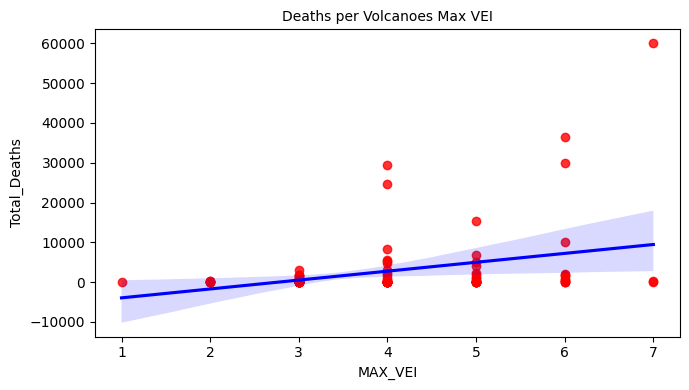

In [165]:
# seaborn scatter plot with regression line
plt.figure(figsize=(7, 4))

sns.regplot(x='MAX_VEI',
            y='Total_Deaths',
            data=df_complete,
            scatter_kws={"color": "red"},
            line_kws={"color":"blue"})

plt.title('Deaths per Volcanoes Max VEI', fontsize=10)
plt.tight_layout()
plt.show()

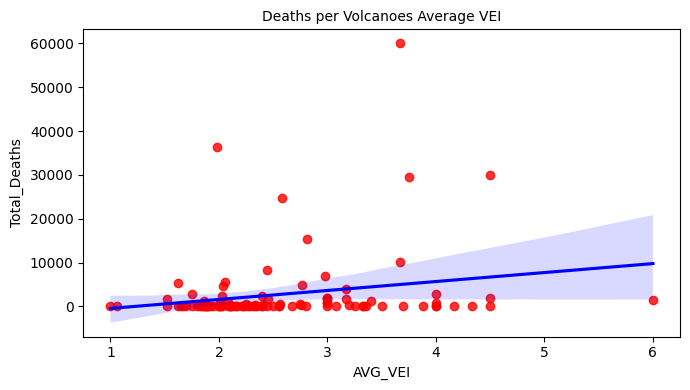

In [161]:
# seaborn scatter plot with regression line
plt.figure(figsize=(7, 4))

sns.regplot(x='AVG_VEI',
            y='Total_Deaths',
            data=df_complete,
            scatter_kws={"color": "red"},
            line_kws={"color":"blue"})

plt.title('Deaths per Volcanoes Average VEI', fontsize=10)
plt.tight_layout()
plt.show()

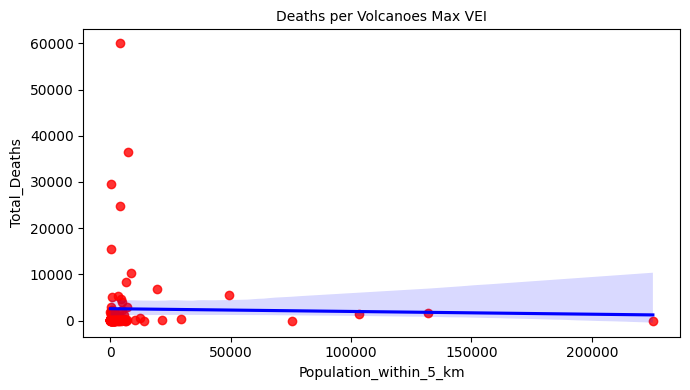

In [173]:
plt.figure(figsize=(7, 4))

sns.regplot(x='Population_within_5_km',
            y='Total_Deaths',
            data=df_complete.query('Population_within_5_km < 500000'),
            scatter_kws={"color": "red"},
            line_kws={"color":"blue"})

plt.title('Deaths per Volcanoes Max VEI', fontsize=10)
plt.tight_layout()
plt.show()

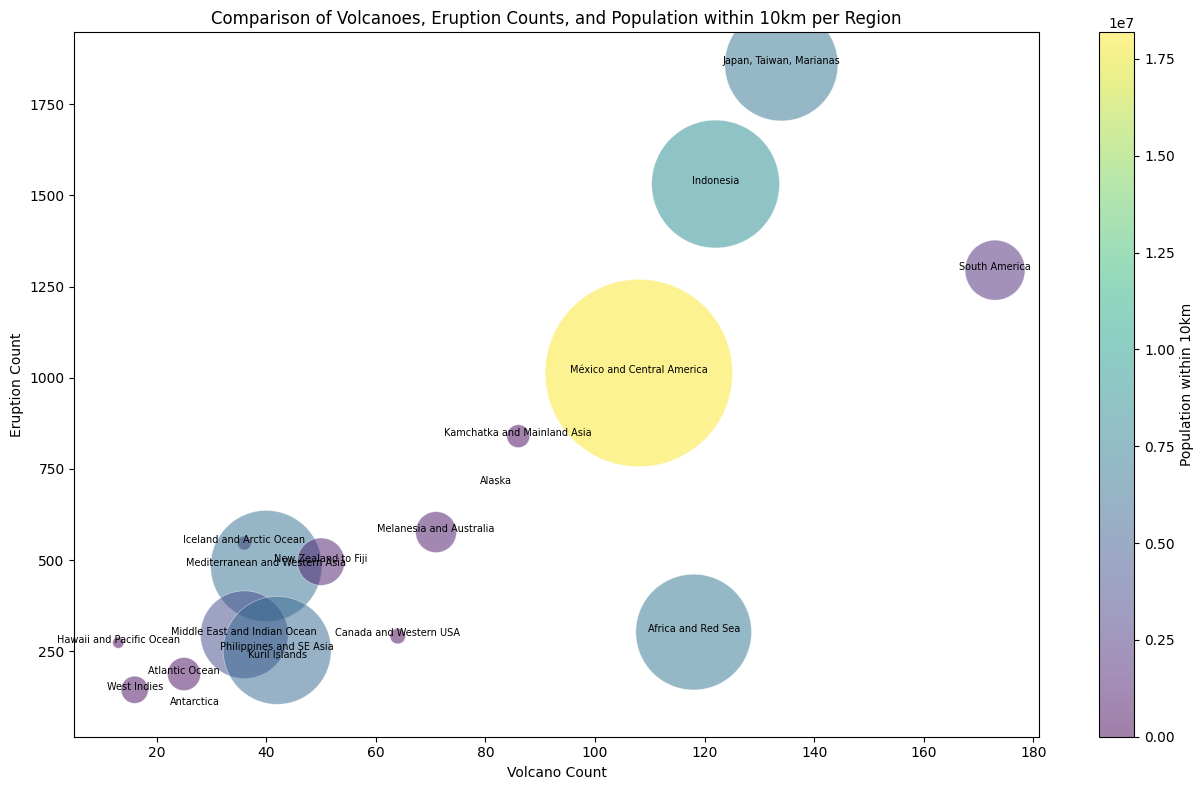

In [6]:
# Bubble Chart to compare data per Region

  # Group and aggregate the data
grouped = df_complete.groupby('Region').agg({
    'Volcano_Name': 'count',
    'Eruption_Count': 'sum',
    'Pop_10km': 'sum'
}).reset_index()

grouped.columns = ['Region', 'Volcano Count', 'Eruption Count', 'Population within 10km']

fig, ax = plt.subplots(figsize=(13, 8))

scatter = ax.scatter(
    grouped['Volcano Count'],
    grouped['Eruption Count'],
    s=grouped['Population within 10km'] / 1000,
    alpha=0.5,
    c=grouped['Population within 10km'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

ax.set_xlabel('Volcano Count')
ax.set_ylabel('Eruption Count')
ax.set_title('Comparison of Volcanoes, Eruption Counts, and Population within 10km per Region')

for i in range(len(grouped)):
    ax.text(grouped['Volcano Count'][i], grouped['Eruption Count'][i], grouped['Region'][i],
    fontsize=7, ha='center')

cbar = plt.colorbar(scatter)
cbar.set_label('Population within 10km')

plt.tight_layout()
plt.show()

In [ ]:
df_complete = pd.read_csv("volcano_combined.csv")

In [ ]:
# Initialize MinMaxScaler
variables = ['Population within 5 km','Pop 10km', 'Pop 30km', 'Pop 100 km']

scaler = MinMaxScaler(feature_range=(0, 1))

df_complete[variables] = scaler.fit_transform(df_complete[variables])
# Fit and transform the data
#df_normalized = pd.DataFrame(scaler.fit_transform(df_complete), columns="pop")


In [ ]:
df_complete

In [7]:
# To numerize all columns for correlation matrix (changing categorical values as numerical values)

df_integer = df_complete

for col_name in df_integer.columns:
  if(df_integer[col_name].dtype == 'object'):
    df_integer[col_name] = df_integer[col_name].astype('category')
    df_integer[col_name] = df_integer[col_name].cat.codes

df_integer

Volcano_Name  Total_Deaths  Population_within_5_km  Pop_10km  Pop_30km  \
0             1102       60000.0                    4156     11331     89006   
1              596       36417.0                    7177      7177      8027   
2              475       30000.0                 2049583   2049583   2948989   
3              868       29523.0                     251      5025    382633   
4              946       24716.0                    3849     20146    507608   
...            ...           ...                     ...       ...       ...   
1280          1280           NaN                       0         0        77   
1281          1281           NaN                  231977    231977    490440   
1282          1282           NaN                       7         7         7   
1283          1283           NaN                     508       922      1075   
1284          1284           NaN                      18        18       246   

      Pop_100_km  Country  Volcano_Number  First_Eruption_Year  \
0        1036033       48          264040              -3910.0   
1        6326159       48          262000                250.0   
2        6689160       27          343060                450.0   
3         609576       37          360120              -8210.0   
4        4252435       18          351020              -6660.0   
...          ...      ...             ...                  ...   
1280       11184       69          300242                  NaN   
1281     4838069       55          341061              -3050.0   
1282      671171       91          221020               1824.0   
1283     1472800       91          221021                  NaN   
1284       54738       88          327120              -8710.0   

      Last_Eruption_Year  ...  MAX_VEI  Primary_Volcano_Type  Subregion  \
0                 1967.0  ...      7.0                    22         54   
1                 2023.0  ...      6.0                     0         52   
2                 1880.0  ...      6.0                     0         30   
3                 1932.0  ...      4.0                    22         98   
4                 2023.0  ...      4.0                    22         27   
...                  ...  ...      ...                   ...        ...   
1280                 NaN  ...      NaN                    23         49   
1281             -3050.0  ...      NaN                    31         56   
1282              2013.0  ...      2.0                    20          3   
1283                 NaN  ...      NaN                    20          3   
1284             -1170.0  ...      NaN                    31         93   

      Latitude  Longitude  Elevation_(m)  Tectonic_Settings  Major_Rock_1  \
0       -8.250    118.000           2850                  6             9   
1       -6.102    105.423            155                  6             0   
2       13.672    -89.053            450                  6             2   
3       14.809    -61.166           1372                  9             0   
4        4.892    -75.324           5279                  6             0   
...        ...        ...            ...                ...           ...   
1280    55.862    160.603           3057                  6             0   
1281    19.400   -100.250           3500                  6             2   
1282    15.050     42.180            191                  5             1   
1283    14.020     42.750            624                  5             1   
1284    34.800   -108.000           2550                  3             1   

      Region  AVG_erup_(days)  
0          7              NaN  
1          7            253.0  
2         14             86.0  
3         18            871.0  
4         17           1169.0  
...      ...              ...  
1280       9              NaN  
1281      14              NaN  
1282       0             15.0  
1283       0              NaN  
1284       4              NaN  

[1285 rows x 22 columns]

In [8]:
# Checking for correlations
# default correlation method is 'pearson'
# 'pearson', 'kendall', 'spearman'

df_integer.corr(method='spearman')

Volcano_Name  Total_Deaths  Population_within_5_km  \
Volcano_Name                1.000000      0.034112               -0.012829   
Total_Deaths                0.034112      1.000000                0.158455   
Population_within_5_km     -0.012829      0.158455                1.000000   
Pop_10km                   -0.016978      0.210361                0.942395   
Pop_30km                   -0.004951      0.191899                0.811743   
Pop_100_km                  0.000475      0.126780                0.736384   
Country                     0.013280     -0.035498               -0.175508   
Volcano_Number              0.013126      0.022610               -0.225793   
First_Eruption_Year        -0.017419     -0.045140               -0.120762   
Last_Eruption_Year         -0.008316     -0.044101               -0.032760   
Eruption_Count             -0.005126     -0.046259                0.013711   
AVG_VEI                    -0.010673      0.300850               -0.008557   
MAX_VEI                     0.025454      0.379493                0.053588   
Primary_Volcano_Type       -0.026826     -0.018643               -0.057249   
Subregion                   0.067270      0.000806                0.028684   
Latitude                   -0.001603     -0.125046               -0.177514   
Longitude                   0.026443     -0.076231                0.017623   
Elevation_(m)              -0.004204      0.034981                0.067701   
Tectonic_Settings           0.086222     -0.035099               -0.156815   
Major_Rock_1               -0.022435     -0.033172                0.050439   
Region                      0.025107      0.002132                0.108628   
AVG_erup_(days)             0.089212      0.169682                0.293911   

                        Pop_10km  Pop_30km  Pop_100_km   Country  \
Volcano_Name           -0.016978 -0.004951    0.000475  0.013280   
Total_Deaths            0.210361  0.191899    0.126780 -0.035498   
Population_within_5_km  0.942395  0.811743    0.736384 -0.175508   
Pop_10km                1.000000  0.913679    0.823693 -0.199498   
Pop_30km                0.913679  1.000000    0.915123 -0.207585   
Pop_100_km              0.823693  0.915123    1.000000 -0.215935   
Country                -0.199498 -0.207585   -0.215935  1.000000   
Volcano_Number         -0.219922 -0.199017   -0.203469 -0.196882   
First_Eruption_Year    -0.130573 -0.192969   -0.204911  0.012487   
Last_Eruption_Year     -0.012252 -0.022539   -0.042551 -0.019059   
Eruption_Count          0.048050  0.092208    0.081306  0.060411   
AVG_VEI                -0.023036 -0.016146   -0.000753  0.043013   
MAX_VEI                 0.046984  0.068195    0.067354  0.026358   
Primary_Volcano_Type   -0.080636 -0.102429   -0.082092  0.082564   
Subregion               0.053252  0.063495    0.039633  0.153337   
Latitude               -0.197164 -0.172357   -0.132785  0.385629   
Longitude               0.025519  0.031710    0.000398  0.109717   
Elevation_(m)           0.173917  0.305600    0.333413 -0.261391   
Tectonic_Settings      -0.141116 -0.139864   -0.166524  0.222963   
Major_Rock_1           -0.020372 -0.102908   -0.096348 -0.055041   
Region                  0.135136  0.142343    0.108585 -0.227061   
AVG_erup_(days)         0.369441  0.465408    0.511228 -0.172057   

                        Volcano_Number  First_Eruption_Year  \
Volcano_Name                  0.013126            -0.017419   
Total_Deaths                  0.022610            -0.045140   
Population_within_5_km       -0.225793            -0.120762   
Pop_10km                     -0.219922            -0.130573   
Pop_30km                     -0.199017            -0.192969   
Pop_100_km                   -0.203469            -0.204911   
Country                      -0.196882             0.012487   
Volcano_Number                1.000000            -0.172921   
First_Eruption_Year          -0.172921             1.000000   
Last_Eruption_Year           -0.11

### Correlation Matrix with Selected Variables

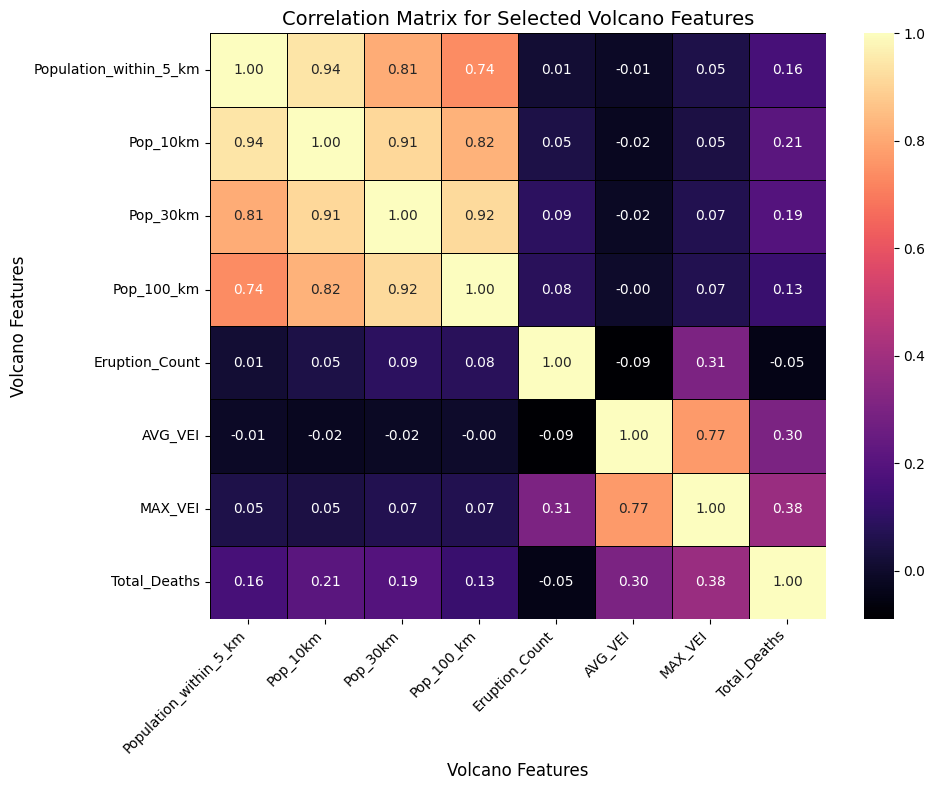

In [24]:
selected_variables = ['Population_within_5_km', 'Pop_10km', 'Pop_30km', 'Pop_100_km', 'Eruption_Count', 'AVG_VEI', 'MAX_VEI', 'Total_Deaths']

# Filter the dataframe to include only the selected variables
df_selected_corr = df_integer[selected_variables]

# Calculate the Spearman correlation matrix for the selected variables
corr_matrix_selected = df_selected_corr.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_selected, annot=True, fmt='.2f', cmap='magma', annot_kws={'fontsize': 10}, linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix for Selected Volcano Features', fontsize=14)
plt.xlabel('Volcano Features', fontsize=12)
plt.ylabel('Volcano Features', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

**Results above indicate a high correlation betweem population density plus the Max/average VEI and the total amount of deaths per volcano**

---



In [25]:
correlation_volc = df_integer.corr(method='spearman')

corr_pairs = correlation_volc.unstack()

sorted_pairs = corr_pairs.sort_values()

In [26]:
high_corr = sorted_pairs[(sorted_pairs) > 0.1]
high_corr['Total_Deaths']

Pop_100_km                0.126780
Population_within_5_km    0.158455
AVG_erup_(days)           0.169682
Pop_30km                  0.191899
Pop_10km                  0.210361
AVG_VEI                   0.300850
MAX_VEI                   0.379493
Total_Deaths              1.000000
dtype: float64

In [57]:
# List of variables to be included in the composite index
variables = ['AVG_VEI', 'MAX_VEI', 'Total_Deaths', 'Population_within_5_km' , 'Pop_10km', 'Pop_30km', 'Pop_100_km']

scaler = StandardScaler()
df_complete[variables] = scaler.fit_transform(df_complete[variables])

weights = {
    'AVG_VEI': 3.0,
    'MAX_VEI': 3.8,
    'Total_Deaths': 1,
    'Population_within_5_km': 1.6,
    'Pop_10km': 2.1,
    'Pop_30km': 1.9,
    'Pop_100_km': 1.2
}

df_complete['composite_index'] = (
    df_complete['AVG_VEI'] * weights['AVG_VEI'] +
    df_complete['MAX_VEI'] * weights['MAX_VEI'] +
    df_complete['Total_Deaths'] * weights['Total_Deaths'] +
    df_complete['Population_within_5_km'] * weights['Population_within_5_km'] +
    df_complete['Pop_10km'] * weights['Pop_10km'] +
    df_complete['Pop_30km'] * weights['Pop_30km'] +
    df_complete['Pop_100_km'] * weights['Pop_100_km']
)


df_complete['rank'] = df_complete['composite_index'].rank(ascending=False)

top_volcanoes = df_complete.sort_values(by='rank')

top_volcanoes_display = top_volcanoes[['Volcano_Name', 'composite_index']]
top_volcanoes_display.head(110)

Volcano_Name  composite_index
57   Michoacan-Guanajuato       102.696469
2                Ilopango        53.741443
79          Campi Flegrei        46.877167
23                   Taal        28.291731
8                Vesuvius        22.916088
..                    ...              ...
97              Augustine              NaN
100        Tair, Jebel at              NaN
107       Tengger Caldera              NaN
108                Mahawu              NaN
109                  Ijen              NaN

[110 rows x 2 columns]

In [58]:
df_complete

Volcano_Name  Total_Deaths  Population_within_5_km  \
0                      Tambora      6.894804               -0.123340   
1                     Krakatau      4.055025               -0.111556   
2                     Ilopango      3.282314                7.854623   
3                        Pelee      3.224875               -0.138571   
4             Ruiz, Nevado del      2.646034               -0.124537   
...                        ...           ...                     ...   
1280                    Zimina           NaN               -0.139550   
1281  Zitacuaro-Valle de Bravo           NaN                0.765251   
1282              Zubair Group           NaN               -0.139522   
1283                     Zukur           NaN               -0.137568   
1284              Zuni-Bandera           NaN               -0.139479   

      Pop_10km  Pop_30km  Pop_100_km        Country  Volcano_Number  \
0    -0.141232 -0.247805   -0.238600      Indonesia          264040   
1    -0.157108 -0.371029    0.815054      Indonesia          262000   
2     7.648796  4.104156    0.887354    El Salvador          343060   
3    -0.165333  0.199000   -0.323539         France          360120   
4    -0.107542  0.389171    0.402023       Colombia          351020   
...        ...       ...         ...            ...             ...   
1280 -0.184538 -0.383126   -0.442723         Russia          300242   
1281  0.702058  0.363047    0.518666         Mexico          341061   
1282 -0.184511 -0.383232   -0.311271          Yemen          221020   
1283 -0.181014 -0.381607   -0.151607          Yemen          221021   
1284 -0.184469 -0.382869   -0.434048  United States          327120   

      First_Eruption_Year  Last_Eruption_Year  ...  \
0                 -3910.0              1967.0  ...   
1                   250.0              2023.0  ...   
2                   450.0              1880.0  ...   
3                 -8210.0              1932.0  ...   
4                 -6660.0              2023.0  ...   
...                   ...                 ...  ...   
1280                  NaN                 NaN  ...   
1281              -3050.0             -3050.0  ...   
1282               1824.0              2013.0  ...   
1283                  NaN                 NaN  ...   
1284              -8710.0             -1170.0  ...   

                              Subregion  Latitude  Longitude Elevation_(m)  \
0                  Lesser Sunda Islands    -8.250    118.000          2850   
1                              Krakatau    -6.102    105.423           155   
2              El Salvador and Honduras    13.672    -89.053           450   
3                           West Indies    14.809    -61.166          1372   
4                              Colombia     4.892    -75.324          5279   
...                                 ...       ...        ...           ...   
1280                Kamchatka Peninsula    55.862    160.603          3057   
1281                             Mexico    19.400   -100.250          3500   
1282  Africa (northeastern) and Red Sea    15.050     42.180           191   
1283  Africa (northeastern) and Red Sea    14.020     42.750           624   
1284                   USA (New Mexico)    34.800   -108.000          2550   

                                 Tectonic_Settings  \
0     Subduction zone / Continental crust (>25 km)   
1     Subduction zone / Continental crust (>25 km)   
2     Subduction zone / Continental crust (>25 km)   
3        Subduction zone / Oceanic crust (< 15 km)   
4     Subduction zone / Continental crust (>25 km)   
...                                            ...   
1280  Subduction zone / Continental crust (>25 km)   
1281  Subduction zone / Continental crust (>25 km)   
1282           Rift zone / Oceanic crust (< 15 km)   
1283           Rift zone / Oceanic crust (< 15 km)   
1284        Rift zone / Continental crust (>25 km)   

                          Major_Rock_1                       Regi

In [59]:
variables_to_revert = ['AVG_VEI', 'MAX_VEI', 'Total_Deaths', 'Population_within_5_km', 'Pop_10km', 'Pop_30km', 'Pop_100_km']


df_complete[variables_to_revert] = scaler.inverse_transform(df_complete[variables_to_revert])

print("Variables have been reverted to their original scale. Here's a preview:")
display(df_complete[variables_to_revert].head())

Variables have been reverted to their original scale. Here's a preview:


AVG_VEI  MAX_VEI  Total_Deaths  Population_within_5_km   Pop_10km  \
0     3.67      7.0       60000.0                  4156.0    11331.0   
1     1.98      6.0       36417.0                  7177.0     7177.0   
2     4.50      6.0       30000.0               2049583.0  2049583.0   
3     3.75      4.0       29523.0                   251.0     5025.0   
4     2.58      4.0       24716.0                  3849.0    20146.0   

    Pop_30km  Pop_100_km  
0    89006.0   1036033.0  
1     8027.0   6326159.0  
2  2948989.0   6689160.0  
3   382633.0    609576.0  
4   507608.0   4252435.0

In [60]:
df_complete

Volcano_Name  Total_Deaths  Population_within_5_km  \
0                      Tambora       60000.0                  4156.0   
1                     Krakatau       36417.0                  7177.0   
2                     Ilopango       30000.0               2049583.0   
3                        Pelee       29523.0                   251.0   
4             Ruiz, Nevado del       24716.0                  3849.0   
...                        ...           ...                     ...   
1280                    Zimina           NaN                     0.0   
1281  Zitacuaro-Valle de Bravo           NaN                231977.0   
1282              Zubair Group           NaN                     7.0   
1283                     Zukur           NaN                   508.0   
1284              Zuni-Bandera           NaN                    18.0   

       Pop_10km   Pop_30km  Pop_100_km        Country  Volcano_Number  \
0       11331.0    89006.0   1036033.0      Indonesia          264040   
1        7177.0     8027.0   6326159.0      Indonesia          262000   
2     2049583.0  2948989.0   6689160.0    El Salvador          343060   
3        5025.0   382633.0    609576.0         France          360120   
4       20146.0   507608.0   4252435.0       Colombia          351020   
...         ...        ...         ...            ...             ...   
1280        0.0       77.0     11184.0         Russia          300242   
1281   231977.0   490440.0   4838069.0         Mexico          341061   
1282        7.0        7.0    671171.0          Yemen          221020   
1283      922.0     1075.0   1472800.0          Yemen          221021   
1284       18.0      246.0     54738.0  United States          327120   

      First_Eruption_Year  Last_Eruption_Year  ...  \
0                 -3910.0              1967.0  ...   
1                   250.0              2023.0  ...   
2                   450.0              1880.0  ...   
3                 -8210.0              1932.0  ...   
4                 -6660.0              2023.0  ...   
...                   ...                 ...  ...   
1280                  NaN                 NaN  ...   
1281              -3050.0             -3050.0  ...   
1282               1824.0              2013.0  ...   
1283                  NaN                 NaN  ...   
1284              -8710.0             -1170.0  ...   

                              Subregion  Latitude  Longitude Elevation_(m)  \
0                  Lesser Sunda Islands    -8.250    118.000          2850   
1                              Krakatau    -6.102    105.423           155   
2              El Salvador and Honduras    13.672    -89.053           450   
3                           West Indies    14.809    -61.166          1372   
4                              Colombia     4.892    -75.324          5279   
...                                 ...       ...        ...           ...   
1280                Kamchatka Peninsula    55.862    160.603          3057   
1281                             Mexico    19.400   -100.250          3500   
1282  Africa (northeastern) and Red Sea    15.050     42.180           191   
1283  Africa (northeastern) and Red Sea    14.020     42.750           624   
1284                   USA (New Mexico)    34.800   -108.000          2550   

                                 Tectonic_Settings  \
0     Subduction zone / Continental crust (>25 km)   
1     Subduction zone / Continental crust (>25 km)   
2     Subduction zone / Continental crust (>25 km)   
3        Subduction zone / Oceanic crust (< 15 km)   
4     Subduction zone / Continental crust (>25 km)   
...                                            ...   
1280  Subduction zone / Continental crust (>25 km)   
1281  Subduction zone / Continental crust (>25 km)   
1282           Rift zone / Oceanic crust (< 15 km)   
1283           Rift zone / Oceanic crust (< 15 km)   
1284        Rift zone / Continental crust (>25 km)   

                          Major_Rock_1   

In [61]:
df_complete.to_csv('volcano_combined_index.csv', index=False)

In [ ]:
### Interactive map using Plotly

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df_volc = pd.read_csv('volcano_comb_index.csv')
df_index = df_volc.loc[df_volc['composite_index'] > -0.3]

scatter_trace = go.Scattermapbox(
    lat=df_volc['Latitude'],
    lon=df_volc['Longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=3,
        color='#7BCCB5',
        opacity=1,
        symbol="circle",
        showscale=False,
        allowoverlap=False,
    ),
    customdata=df_volc[[
        'Volcano_Name','Primary_Volcano_Type',
        'First_Eruption_Year', 'Last_Eruption_Year',
        'Eruption_Count', 'AVG_VEI', 'MAX_VEI',
        'Total_Deaths', 'Population_within_5km',
        'Pop_10km', 'Pop_30km', 'Pop_100km']],
    hovertemplate=(
        '<b><i>%{customdata[0]}</i></b><br>' +
        '<br>'
        '<b>Primary Volcano Type: %{customdata[1]}</b><br>' +
        '<b>First Eruption Year: %{customdata[2]}</b><br>' +
        '<b>Last Eruption Year: %{customdata[3]}</b><br>' +
        '<b>Eruption Count: %{customdata[4]}</b><br>' +
        '<b>Average VEI: %{customdata[5]}</b><br>' +
        '<b>Max VEI: %{customdata[6]}</b><br>' +
        '<b>Total Deaths: %{customdata[7]}</b><br>' +
        '<b>Population within 5 km: %{customdata[8]}</b><br>' +
        '<b>Population within 10 km: %{customdata[9]}</b><br>' +
        '<b>Population within 30 km: %{customdata[10]}</b><br>' +
        '<b>Population within 100 km: %{customdata[11]}</b><br>'
    ),
    name='Volcanoes',
    below="''"
)

outline_trace_2 = go.Scattermapbox(
    lat=df_index['Latitude'],
    lon=df_index['Longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=9,
        color='#B6B6B6',
        allowoverlap=False,
    ),
    hoverinfo='skip',
    legendgroup='<i>Noteworthy Volcanoes</i>',
    showlegend=False,
    name='<i>Noteworthy Volcanoes</i>'
)

scatter_trace_2 = go.Scattermapbox(
    lat=df_index['Latitude'],
    lon=df_index['Longitude'],
    mode='markers',
    legendgroup='<i>Noteworthy Volcanoes</i>',
    showlegend=True,
    marker=go.scattermapbox.Marker(
        size=7,
        color='#7D0552',
        opacity=1,
        symbol='circle',
        showscale=False,
        allowoverlap=False
    ),
    customdata=df_index[[
        'Volcano_Name','Primary_Volcano_Type',
        'First_Eruption_Year', 'Last_Eruption_Year',
        'Eruption_Count', 'AVG_VEI', 'MAX_VEI',
        'Total_Deaths', 'Population_within_5km',
        'Pop_10km', 'Pop_30km', 'Pop_100km', 'rank']],
    hovertemplate=(
        '<b><i>%{customdata[0]}</i></b><br>' +
        '<br>'
        '<b>Primary Volcano Type: %{customdata[1]}</b><br>' +
        '<b>First Eruption Year: %{customdata[2]}</b><br>' +
        '<b>Last Eruption Year: %{customdata[3]}</b><br>' +
        '<b>Eruption Count: %{customdata[4]}</b><br>' +
        '<b>AVG VEI: %{customdata[5]}</b><br>' +
        '<b>MAX VEI: %{customdata[6]}</b><br>' +
        '<b>Total Deaths: %{customdata[7]}</b><br>' +
        '<b>Population within 5 km: %{customdata[8]}</b><br>' +
        '<b>Population within 10 km: %{customdata[9]}</b><br>' +
        '<b>Population within 30 km: %{customdata[10]}</b><br>' +
        '<b>Population within 100 km: %{customdata[11]}</b><br>' +
        '<br>'
        '<i>Rank per Composite Index score</i>: <b>%{customdata[12]}</b><br>'
    ),
    name='<i>Noteworthy Volcanoes</i>'
)

density_trace = go.Densitymapbox(
    lat=df_index['Latitude'],
    lon=df_index['Longitude'],
    z=df_index['composite_index'],
    radius=30,
    showlegend=True,
    colorscale='pinkyl',
    showscale=False,
    hoverinfo='none',
    name='Heatmap of Volcanoes per <i>Composite Index score</i>',
)

fig = go.Figure()

fig.add_trace(density_trace)
fig.add_trace(scatter_trace)
fig.add_trace(outline_trace_2)
fig.add_trace(scatter_trace_2)

fig.update_layout(
    mapbox=dict(
        style='carto-darkmatter',
        zoom=2,
        center=dict(lat=25, lon=0)
    ),
    margin={"r":0,"t":0,"l":0,"b":0},
    height=750,
    legend_title_text='<b>Legend</b>',
    legend=dict(
        yanchor="top",
        y=0.975,
        xanchor="right",
        x=0.9975,
        bgcolor='#2C3539',
        bordercolor='#0C090A',
        borderwidth=0.5,
        font=dict(
            family="Arial",
            size=12,
            color="#F2F0DF"
        )
    )
)

fig.show()

In [ ]:
import plotly.express as px

df_volc = pd.read_csv('volcano_comb_index.csv')

fig = px.scatter_mapbox(df_complete,
                        lat='Latitude',
                        lon='Longitude',
                        color='MAX VEI',
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        opacity=0.7,
                        hover_name='Volcano Name',
                        hover_data=['Primary Volcano Type', 'First Eruption Year',
                                    'Last Eruption Year', 'Eruption Count', 'AVG VEI', 'MAX VEI',
                                    'Total_Deaths', 'Population within 5 km', 'Pop 10km', 'Pop 30km',
                                    'Pop 100 km'],
                        zoom=1.5,
                        height=900,
                        width=1700)

fig.update_layout(mapbox_style='carto-positron',
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.update_traces(marker=dict(size=5))

fig.show()

In [ ]:
df_vei = df_volc.loc[df_volc['MAX_VEI'] > 4]

fig = px.scatter_mapbox(df_vei,
                        lat='Latitude',
                        lon='Longitude',
                        color='MAX_VEI',
                        opacity=1,
                        color_continuous_scale=px.colors.sequential.Viridis,
                        hover_name='Volcano_Name',
                        hover_data=['Primary_Volcano_Type', 'First_Eruption_Year',
                                    'Last_Eruption_Year', 'Eruption_Count', 'AVG_VEI', 'MAX_VEI',
                                    'Total_Deaths', 'Population_within_5km', 'Pop_10km', 'Pop_30km',
                                    'Pop_100km'],
                        zoom=1.5,
                        height=900,
                        width=1700)

fig.update_layout(mapbox_style='carto-positron',
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.update_traces(marker=dict(size=8))

fig.show()

In [ ]:
pip install pydeck

In [ ]:
### Interactive 3D Hexagon map using Deck.gl

import pydeck as pdk
import pandas as pd

df_volc = pd.read_csv('volcano_comb_index.csv')

view_state = pdk.ViewState(
    longitude=0,
    latitude=10,
    zoom=2,
    min_zoom=2,
    max_zoom=15,
    pitch=45,
    bearing=0,
)

Hexlayer = pdk.Layer(
    "HexagonLayer",
    data=df_volc,
    get_position=["Longitude", "Latitude"],
    getElevationWeight='Pop_30km',
    getColorWeight='Pop_30km',
    color_range=[[123, 204, 181], [249, 253, 122], [250, 133, 31], [242, 84, 41], [246, 44, 41], [217, 1, 11], [103, 0, 13]],
    auto_highlight=True,
    elevation_scale=500,
    pickable=True,
    extruded=True,
    elevation_range=[0, 5000],
    coverage=60,
    radius=600,
    map_style="https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json"
)

tooltip = {
    "html": "<b>Population_within_30km:</b> {elevationValue}",
    "style": {
        "backgroundColor": "steelblue",
        "color": "white"
    }
}

deck = pdk.Deck(
    layers=[Hexlayer],
    initial_view_state=view_state,
    tooltip=tooltip
)

deck